Shape of X: (60000, 28, 28, 1)
Shape of y: (60000,)


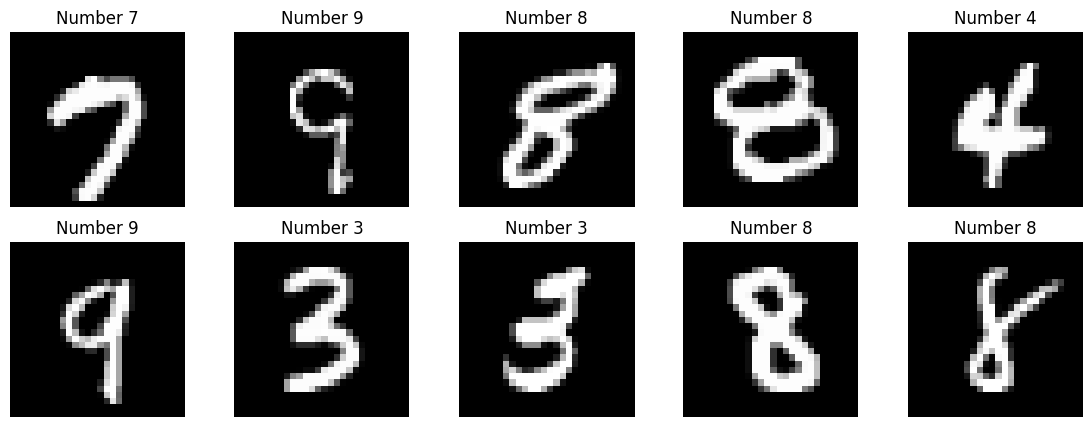

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = load_data()

# Display the first 10 numbers
j = 1
plt.figure(figsize=(14, 5))
for i in np.random.randint(low=0, high=len(X_train), size=[10]):
    plt.subplot(2, 5, j)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Number ' + str(y_train[i]))
    j += 1

# Reshape
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

# Shape de X_train et y_train
print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)

In [6]:
# Creation of a dataset from [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))


<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


In [4]:
# We add 1 to each element
dataset = dataset.map(lambda x : x+1)

<_MapDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


In [7]:

import numpy as np

# Create a simple dataset with some numbers
data = np.arange(10)
dataset = tf.data.Dataset.from_tensor_slices(data)

# Define a simple function to apply to each element
def process_element(x):
    # Simulate a time-consuming operation
    return x ** 2

# Use map with num_parallel_calls to speed up processing
# Setting num_parallel_calls to tf.data.AUTOTUNE allows TensorFlow to determine the optimal number of parallel calls
processed_dataset = dataset.map(process_element, num_parallel_calls=tf.data.AUTOTUNE)

# Iterate over the processed dataset and print results
for element in processed_dataset:
    print(element.numpy())


0
1
4
9
16
25
36
49
64
81


In [8]:
# We shuffle the dataset
shuffled_dataset = dataset.shuffle(buffer_size=4)
for element in shuffled_dataset:
    print(element.numpy())

2
0
5
3
1
6
8
9
4
7


In [9]:
# Separation of the dataset into batches of size 3
dataset_batch = dataset.batch(batch_size=3)
for element in dataset_batch:
    print(element.numpy())

[0 1 2]
[3 4 5]
[6 7 8]
[9]


In [10]:
# Creates a copy of the database as many times as desired. 
# If the count argument to this method is None, then the dataset will be repeated indefinitely.
repeated_dataset = dataset.repeat(count=2)
for element in repeated_dataset:
    print(element.numpy())

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [ ]:
# Example of a pipeline for resizing images and grouping them into batches:
# Dataset creation
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Resize each element
dataset = dataset.map(lambda x, y : [tf.image.resize(x, (128, 128)), y])
# Shuffle and batch
dataset = dataset.shuffle(20000).batch(64)

In [14]:
def transform(x, y):
    # Resize data
    img = tf.reshape(x, (28, 28, 1))

    # Data augmentation
    img = tf.image.random_crop(img, [25, 25, 1])
    
    # Return the resized images
    return tf.image.resize(img, (28, 28)), y


# Dataset creation
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# Resize each element
dataset = dataset.map(transform)
# Shuffle and batch
dataset = dataset.shuffle(20000).batch(64)



In [29]:
batched_dataset = dataset # processed_dataset.batch(2)

# Iterate over the processed dataset and print results
for x_batch, y_batch in batched_dataset:
    print("Processed:", x_batch.shape , "Labels:", y_batch.numpy())
    break
  

Processed: (64, 28, 28, 1) Labels: [4 3 1 0 0 8 9 0 4 9 4 7 5 0 9 0 6 1 9 9 8 9 7 3 2 2 4 1 0 5 7 1 1 2 4 9 9
 9 8 4 0 1 2 6 2 1 0 1 5 7 9 3 8 9 8 5 4 9 9 6 5 1 4 9]


In [30]:
for (X_b, y_b) in dataset.take(count=2):
    print('Shape of the batch X :', X_b.shape)
    print('Target elements of the batch :', y_b.numpy(), '\n')

Shape of the batch X : (64, 28, 28, 1)
Target elements of the batch : [6 9 4 3 9 1 3 0 8 9 8 2 1 4 6 3 9 6 8 9 9 3 1 4 9 6 4 1 1 4 6 5 6 9 5 5 0
 5 2 3 7 8 3 6 2 2 7 0 4 1 4 8 5 8 2 3 7 8 7 5 0 3 7 3] 

Shape of the batch X : (64, 28, 28, 1)
Target elements of the batch : [4 7 7 2 3 3 5 6 7 9 4 1 6 4 7 8 4 7 0 5 5 2 3 2 7 9 9 2 0 1 0 1 9 0 7 6 2
 8 8 6 5 2 1 9 5 3 3 2 6 6 4 4 3 1 8 5 2 8 4 1 6 7 0 7] 



In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

lenet = tf.keras.Sequential()

lenet.add(Conv2D(filters=30,                   # Filters number
                 kernel_size=(5, 5),            # Kernel shape
                 input_shape=(28, 28, 1),       # Input Shape
                 activation='relu'))            # Activation function
lenet.add(MaxPooling2D(pool_size=(2, 2)))

lenet.add(Conv2D(filters=16,
                 kernel_size=(3, 3),
                 activation='relu'))
lenet.add(MaxPooling2D(pool_size=(2, 2)))

lenet.add(Flatten())
lenet.add(Dropout(rate=0.2))

lenet.add(Dense(units=128, activation='relu'))
lenet.add(Dense(units=10, activation='softmax'))

lenet.summary()

C:\Users\aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 30)     │           780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         4,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,734 (225.52 KB)

 Trainable params: 57,734 (225.52 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
lenet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [34]:
history = lenet.fit(dataset,                          # Training Dataset
                    epochs=20,                        # Epochs numbers
                    validation_data=(X_test, y_test)  # Validation dataset
                    )


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7327 - loss: 1.9818 - val_accuracy: 0.9597 - val_loss: 0.1339
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9475 - loss: 0.1686 - val_accuracy: 0.9768 - val_loss: 0.0715
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9606 - loss: 0.1246 - val_accuracy: 0.9768 - val_loss: 0.0748
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9699 - loss: 0.1004 - val_accuracy: 0.9843 - val_loss: 0.0477
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9711 - loss: 0.0934 - val_accuracy: 0.9809 - val_loss: 0.0570
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9736 - loss: 0.0850 - val_accuracy: 0.9816 - val_loss: 0.0631
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9766 - loss: 0.0795 - val_accuracy: 0.9841 - val_loss: 0.0492
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9773 - loss: 0.0723 - val_accuracy: 0

In [36]:
y_prob = lenet(X_test)

# Class prediction
y_pred = tf.argmax(y_prob, axis=1).numpy()

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Accuracy :', accuracy_score(y_test, y_pred))


Accuracy : 0.9882


In [38]:
confusion_matrix(y_test, y_pred)


array([[ 968,    0,    2,    0,    0,    2,    6,    1,    0,    1],
       [   1, 1123,    1,    2,    0,    0,    5,    3,    0,    0],
       [   1,    0, 1025,    0,    0,    0,    1,    5,    0,    0],
       [   0,    0,    0, 1000,    0,    8,    0,    2,    0,    0],
       [   0,    3,    1,    0,  962,    0,    0,    2,    2,   12],
       [   0,    0,    0,    5,    0,  886,    1,    0,    0,    0],
       [   2,    1,    1,    0,    1,    2,  951,    0,    0,    0],
       [   0,    1,    3,    0,    0,    0,    0, 1024,    0,    0],
       [   1,    1,    2,    3,    0,    3,    1,    2,  958,    3],
       [   0,    1,    0,    0,    7,    7,    0,    7,    2,  985]],
      dtype=int64)

In [39]:
# Definition of the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training function

def train_op(model, inputs, targets):
    with tf.GradientTape() as tape:
        # Model prediction
        y_pred = model(inputs, training=True)
        # Calculation of the loss function
        loss_value = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(targets, y_pred))
    # Calculation of the gradient of the loss function
    grads = tape.gradient(loss_value, model.trainable_variables)
    # Gradient Descent
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Return the value of the loss function
    return loss_value.numpy()

Epoch 0  Loss 0.04515828
Epoch 1  Loss 0.0660205
Epoch 2  Loss 0.062009044
Epoch 3  Loss 0.069565095
Epoch 4  Loss 0.04620759


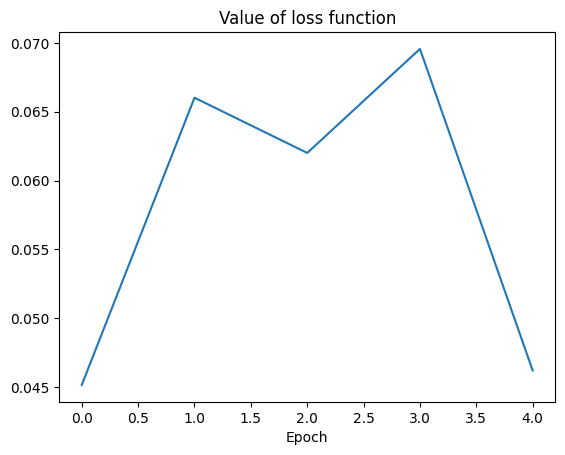

In [40]:
import matplotlib.pyplot as plt
grads = []
epochs = 5

# Model training
for i in range(epochs):
    # For each epoch
    for X_t, y_t in dataset:
        # Train the model for each batch
        train_op(lenet, X_t, y_t)

    # Cost function for the validation set
    loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_test, lenet(X_test.reshape([-1, 28, 28, 1])))).numpy()
    print('Epoch', i, ' Loss', loss)
    grads.append(loss)

# Or
# lenet.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# lenet.fit(dataset, batch_size=64, epochs=10)

# Display the evolution of the loss function
plt.plot(grads)
plt.xlabel('Epoch')
plt.title('Value of loss function')
plt.show()
